In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
path = "../../data/"
file_name = path + "pctdata.csv"
df = pd.read_csv(file_name)

In [3]:
df

,id_plane,id_x,id_y,i_event,i_time_stamp
0,1,492.0,310.0,32,21600
1,1,493.0,310.0,32,21600
2,1,493.0,311.0,32,21600
3,1,492.0,311.0,32,21600
4,1,493.0,312.0,32,21600
...,...,...,...,...,...
220133,0,472.0,271.0,240306,19215829070
220134,0,472.0,272.0,240306,19215829070
220135,0,473.0,272.0,240306,19215829070
220136,0,472.0,273.0,240306,19215829070


#### To understand these data easily, <br/> we have to see 'describe()' and 'unique()' function in this dataframe.

In [4]:
df.describe()

,id_plane,id_x,id_y,i_event,i_time_stamp
count,220138.000000,220138.000000,220138.000000,220138.000000,2.201380e+05
mean,0.977087,542.052535,293.056724,121902.603517,9.747214e+09
std,0.808873,164.238880,95.414469,68927.426627,5.513849e+09
min,0.000000,0.000000,0.000000,32.000000,2.160000e+04
25%,0.000000,498.000000,253.000000,62468.000000,4.991985e+09
50%,1.000000,540.000000,293.000000,125313.000000,1.002388e+10
75%,2.000000,587.000000,340.000000,179091.000000,1.431988e+10
max,2.000000,1023.000000,511.000000,240306.000000,1.921583e+10


In [5]:
df['id_plane'].unique()

array([1, 2, 0], dtype=int64)

* There are only three values - ``0``, ``1``, ``2``.
* I can assume that they are indicated some type.

In [6]:
print(df['i_event'].unique())
print(df['i_event'].nunique())

[    32     33     47 ... 240276 240277 240306]
22789


* Total number of data is ``220138`` and 'id_plane' has ``22789`` values.
* Some of them has same 'id_plane'. This may indicated their attribute.

In [7]:
df['i_time_stamp'].unique()

array([      21600,       22400,       33598, ..., 19215805070,
       19215805870, 19215829070], dtype=int64)

* Through the name, I can assume that it will be related with time.

* First, as I wrote before, I classified data according to 'id_plane'.

In [8]:
df0 = df[df['id_plane']==0]
df1 = df[df['id_plane']==1]
df2 = df[df['id_plane']==2]

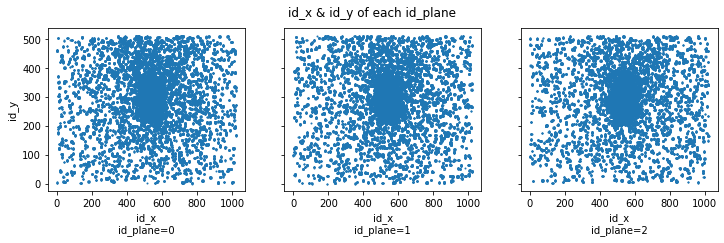

In [9]:
fig,ax = plt.subplots(1,3, sharey=True)
plt.suptitle("id_x & id_y of each id_plane")
ax[0].scatter(df0['id_x'],df0['id_y'], s=1)
ax[0].set_xlabel("id_x\nid_plane=0")
ax[0].set_ylabel("id_y")
ax[1].scatter(df1['id_x'],df1['id_y'], s=1)
ax[1].set_xlabel("id_x\nid_plane=1")
ax[2].scatter(df2['id_x'],df2['id_y'], s=1)
ax[2].set_xlabel("id_x\nid_plane=2")
fig.set_size_inches(12,3)
plt.show()

* In here, we can see three of them look similar.
* So, I made 3D scatter plot to see them three-dimensionally.

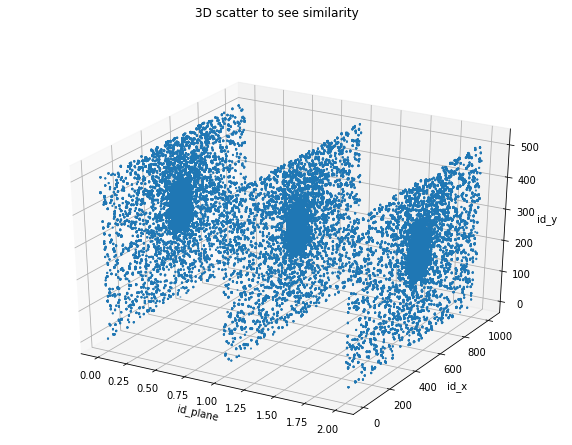

In [10]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
x = df['id_plane']
y = df['id_x']
z = df['id_y']
ax.scatter(x,y,z, s=1)
ax.set_xlabel("id_plane")
ax.set_ylabel("id_x")
ax.set_zlabel("id_y")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

* After seeing this graph, I assume that this means three-layer particle data.
* So I overlaid these data to see in one layer

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df0['id_x'],df0['id_y'],c='#E84A5F',s=1)
plt.scatter(df1['id_x'],df1['id_y'],c='#FF847C',s=1)
plt.scatter(df2['id_x'],df2['id_y'],c='#FECEAB',s=1)
plt.show()

* We can see that scatters are widely distributed from (400,200) to (700,400)